<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/IMDB_Classification_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 1000
maxlen = 20





Using TensorFlow backend.


In [0]:
#!pip install numpy==1.16.1

In [3]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [5]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 218
1 : 189
2 : 141
3 : 550
4 : 147
5 : 43
6 : 123
7 : 562
8 : 233
9 : 130
10 : 450


In [6]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 68
1 : 260
2 : 603
3 : 181
4 : 108
5 : 132
6 : 761
7 : 180
8 : 134
9 : 370
10 : 209


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [8]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [9]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [10]:
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [11]:

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])
  

1646592/1641221 [==============================] - 1s 0us/step


In [12]:
decoded_review

'story was so ? because it was true and was ? life after all that was ? with us all'

In [0]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[1]])

In [14]:
decoded_review

'on the ? that was the ? and have a good old laugh at how bad everything was back then'

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])


W0703 13:38:48.327506 140071913744256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 13:38:48.376499 140071913744256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 13:38:48.386255 140071913744256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 13:38:48.432431 140071913744256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 13:38:48.454739 140071913744256 deprecation_wrappe

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train,y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

W0703 13:39:04.933425 140071913744256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 339us/step - loss: 0.6772 - acc: 0.6006 - val_loss: 0.6448 - val_acc: 0.6704
Epoch 2/10
20000/20000 [==============================] - 3s 140us/step - loss: 0.5830 - acc: 0.7188 - val_loss: 0.5629 - val_acc: 0.7046
Epoch 3/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.5152 - acc: 0.7464 - val_loss: 0.5362 - val_acc: 0.7208
Epoch 4/10
20000/20000 [==============================] - 3s 138us/step - loss: 0.4879 - acc: 0.7607 - val_loss: 0.5299 - val_acc: 0.7292
Epoch 5/10
20000/20000 [==============================] - 3s 143us/step - loss: 0.4731 - acc: 0.7694 - val_loss: 0.5290 - val_acc: 0.7334
Epoch 6/10
20000/20000 [==============================] - 3s 145us/step - loss: 0.4633 - acc: 0.7773 - val_loss: 0.5317 - val_acc: 0.7344
Epoch 7/10
20000/20000 [==============================] - 3s 143us/step - loss: 0.4548 - acc: 0.7819 - val_loss: 0.5333 - v

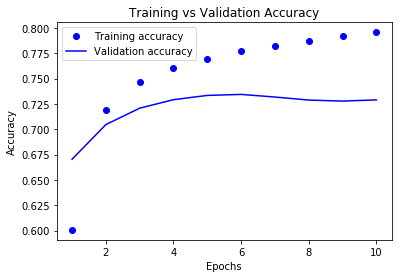

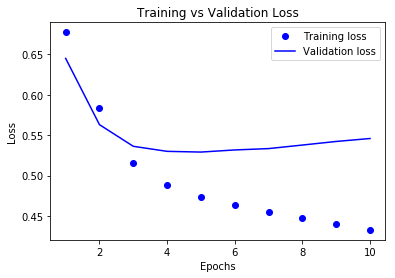

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# **Accuracy Achieved - 72%**
## **(with Embedding and one Dense layer )**

We have achived 72% with just one embedding and dense layer which is not bad, however we should make use of RNN here so as to understand the embedding more thoroughly

Now lets use the raw IMDB dataset and then we will be using Word2Vec or Glove

In [0]:
import os, shutil
from google.colab import drive
from tqdm import tqdm
import pickle

In [20]:
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [21]:
os.getcwd()

'/gdrive'

In [0]:
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb')

In [0]:
base_dir = '/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb'

In [0]:
'''train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

texts = []
labels = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  print(dir_name)
  for file in tqdm(os.listdir(dir_name)):
    if file.endswith('.txt'):
      file_path = os.path.join(dir_name,file)
      with open(file_path) as f_name:
        texts.append(f_name.read())
        if label_type == 'neg':
          labels.append(0)
        else:
          labels.append(1)
'''

  0%|          | 43/12500 [00:00<00:29, 429.10it/s]

/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/train/neg


  0%|          | 0/12500 [00:00<?, ?it/s]

/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/train/pos


100%|██████████| 12500/12500 [1:01:03<00:00,  3.20it/s]


In [0]:
'''
import pickle
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')
filename1 = open('texts_serialized.pkl','wb')
pickle.dump(texts,filename1)
filename1.close()
filename2 = open('labels_serialized.pkl','wb')
pickle.dump(labels,filename2)
filename2.close()
'''


In [0]:
texts = []
labels = []
import pickle
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')
filename1 = open('texts_serialized.pkl','rb')
texts = pickle.load(filename1)
filename1.close()
filename2 = open('labels_serialized.pkl','rb')
labels = pickle.load(filename2)
filename2.close()


In [32]:
len(labels), len(texts)

(25000, 25000)

In [40]:
texts[0]

'Good Deaths. Good Mask. Cool Axe. Good Looking Girls....But Watch Out!!! No Plot and Little Scares Completely lower it\'s Standards. They Tried to make an "I Know what you Did Last Summer", but ended up making A "Scream". But Hey, What do people Expect From a Horror Movie? Answers Totally Vary. Rent It If You Want, but I Regret Ever Seeing It.'

In [38]:
labels[24990:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlength = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words = max_words )


In [42]:
tokenizer.word_index

{}

In [0]:
tokenizer.fit_on_texts(texts)

In [44]:
for i,j in tokenizer.word_index.items():
  if j > 10:
    break
  else:
    print(i,j)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


In [0]:
sequences = tokenizer.texts_to_sequences(texts)

In [46]:
print(len(sequences))
print(len(sequences[0] ))

25000
62


In [47]:
word_index = tokenizer.word_index
print('found {} unique token'.format(len(word_index)))
data = pad_sequences(sequences,maxlen = maxlength)

found 88582 unique token


In [51]:
print(len(sequences))
print(len(sequences[0] ))
print(len(data[1] ))
print(type(data))

25000
62
100
<class 'numpy.ndarray'>


In [52]:
import numpy as np
labels = np.asarray(labels)
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (25000, 100)
Label shape: (25000,)


Now we will shuffle the indices and then pick the train and validation data 

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

In [54]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((200, 100), (200,), (10000, 100), (10000,))

In [56]:
glove_dir = '/gdrive/My Drive/colab_datasets/base_dir_imdb/Word_vectorization'
embedding_index = {}
glove_file = os.path.join(glove_dir,'glove.6B.100d.txt')
with open(glove_file) as gfile:
  for line in gfile:
    values = line.split()
    word = values[0]
    coefs= np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
print('found {} words in index'.format(len(embedding_index)) )
    

found 400000 words in index


In [57]:
os.getcwd()
#os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')

'/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models'

In [0]:
import pickle
embedding_file = open('embedding_index.pkl','wb')
pickle.dump(embedding_index,embedding_file)
embedding_file.close()

In [67]:
for i,(word,coef) in enumerate(embedding_index.items()):
  if i< 1:
    print(word,coef, len(coef))

the [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.270

In [0]:
max_words
embedding_dim = 100

In [75]:
for i,(word,index) in enumerate(word_index.items()):
  if i < 10:
    print(word,index)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


In [81]:
max_words, embedding_dim

(10000, 100)

In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word,index in word_index.items():
  if index<max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
  

In [87]:
embedding_matrix.shape

(10000, 100)

In [94]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

Defining the model

In [122]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlength))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.layers

Loading pretraing word embedding to the embedding layer

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

We need to freeze the layer0 as well as we dont want the weights to be updated again.

In [0]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy', metrics = ['acc'])

In [126]:
history = model.fit(x_train,y_train,epochs=10,batch_size = 32, validation_data = (x_val,y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.3162 - acc: 0.5550 - val_loss: 0.7473 - val_acc: 0.4938
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5569 - acc: 0.6900 - val_loss: 0.8580 - val_acc: 0.4938
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5349 - acc: 0.7100 - val_loss: 0.6803 - val_acc: 0.5744
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4288 - acc: 0.7500 - val_loss: 0.6954 - val_acc: 0.5621
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1964 - acc: 0.9650 - val_loss: 1.6222 - val_acc: 0.4937
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2743 - acc: 0.8950 - val_loss: 0.7877 - val_acc: 0.5544
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0960 - acc: 0.9900 - val_loss: 0.7195 - val_acc: 0.5732
Epoch 8/10
200/200 [========

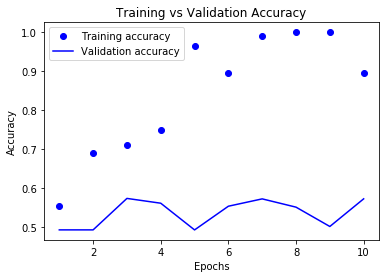

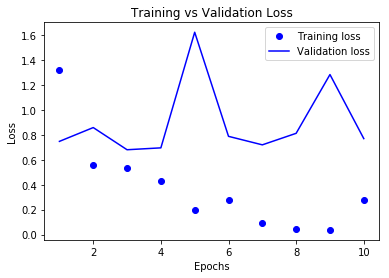

In [127]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [128]:
os.getcwd()

'/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models'

In [0]:
model.save_weights('pre_trained_glove_model.h5')